# Adidas US Sales Project Using ML

# Problem Statement: 
This data for the purpose of is to analyze sales trends, identifying successful products or to analyze the effectiveness of different marketing or sales channels.
This Adidas Sales dataset is a collection of mock data that includes information on the sales of Adidas products in the United States for 2020-21.

#  Importing Modules

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [395]:
df = pd.read_csv('Adidas US Sales.csv') 

In [396]:
df.head()

,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method
0,1,Foot Locker,1185732,2021-11-06,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online
1,2,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet
2,3,West Gear,1128299,2021-01-19,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet
3,4,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online
4,5,Sports Direct,1197831,2021-09-14,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet


Here we imported the dataset using **pd.read_csv** and **df.head()** display top 5 the columns present in the dataset.

**Attribute Information:**

Here is the meaning of each column in the dataset:
1. sales_id: A unique identifier assigned to each record in the dataset.
2. retailer: Represents the business or individual that sells Adidas products directly to consumers.
3. retailer_id: A unique identifier assigned to each retailer in the dataset.
4. invoice_date: The date when a particular invoice or sales transaction took place.
5. region: Refers to a specific geographical area or district where the sales transaction occured.
6. state: Represents a specific administrative division or territory within a country where the sales transaction occured.
7. city: Refers to an urban area or municipality where the sales transaction occured.
8. product: Represents the classification or grouping of Adidas products.
9. price_per_unit: The cost or price associated with a single unit of a product. Values in USD.
10. units_sold: The quantity or number of units of a particular product sold during a specific sales transaction.
11. total_sales: The overall revenue generated from the sales transaction. Values in USD.
12. operating_profit: The profit earned by the retailer from its normal business operations. Values in USD.
13. sales_method: The approach or channel used by the retailer to sell its products.

## Exploratory Data Analysis(EDA)

In [397]:
df.shape

(9637, 13)

This Dataset contain 9637 rows and 13 columns

In [398]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_id          9637 non-null   int64 
 1   retailer          9637 non-null   object
 2   retailer_id       9637 non-null   int64 
 3   invoice_date      9637 non-null   object
 4   region            9637 non-null   object
 5   state             9637 non-null   object
 6   city              9637 non-null   object
 7   product           9637 non-null   object
 8   price_per_unit    9637 non-null   int64 
 9   units_sold        9637 non-null   int64 
 10  total_sales       9637 non-null   int64 
 11  operating_profit  9637 non-null   int64 
 12  sales_method      9637 non-null   object
dtypes: int64(6), object(7)
memory usage: 978.9+ KB


This gives the information about the dataset which include indexing type, column type, non-null values and memory usage

In [399]:
# Checking null values in the dataframe
df.isna().sum()

sales_id            0
retailer            0
retailer_id         0
invoice_date        0
region              0
state               0
city                0
product             0
price_per_unit      0
units_sold          0
total_sales         0
operating_profit    0
sales_method        0
dtype: int64

All columns have a value of 0, which means that there are no missing values (nulls) in any of the columns of the DataFrame.


<Axes: >

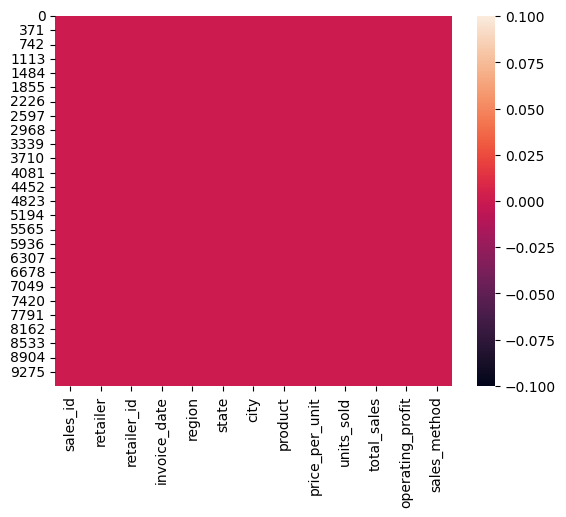

In [400]:
sns.heatmap(df.isnull())

The heatmap is entirely filled with a single color , indicating that no null values are present across the entire DataFrame.

In [401]:
df.nunique()

sales_id            9637
retailer               6
retailer_id            4
invoice_date         724
region                 5
state                 50
city                  52
product                6
price_per_unit        94
units_sold           360
total_sales         3081
operating_profit    1529
sales_method           3
dtype: int64

These are the number of unique values present in each columns.

In [402]:
# seperating numerical and categorical colums in dataset
numcol=[]
catcol=[]

for i in df.columns:
    if df[i].dtype=='object':
        catcol.append(i)
    else:
        numcol.append(i)

This is aimed at separating numerical and categorical columns in a DataFrame.
This process helps in distinguishing between numerical and categorical data

In [403]:
numcol

['sales_id',
 'retailer_id',
 'price_per_unit',
 'units_sold',
 'total_sales',
 'operating_profit']

In [404]:
catcol

['retailer',
 'invoice_date',
 'region',
 'state',
 'city',
 'product',
 'sales_method']

In [405]:
retailer_sales = df.groupby('retailer')['total_sales'].sum().sort_values(ascending=False)
print("Total Sales by Retailer:")
print(retailer_sales)

Total Sales by Retailer:
retailer
West Gear        32317808
Foot Locker      29004945
Sports Direct    24557997
Kohl's           13512453
Walmart          10506085
Amazon           10096987
Name: total_sales, dtype: int64


It is grouped by the "retailer" column, and for each retailer, the total sales are calculated. After summing the sales for each retailer, the retailers are sorted from highest to lowest sales.

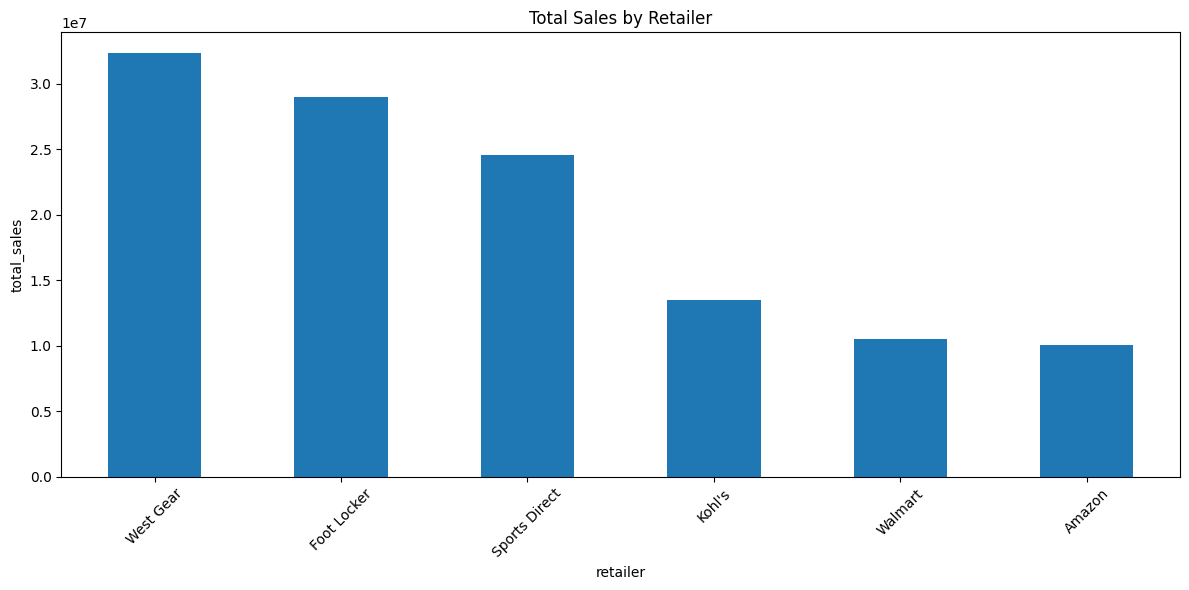

In [406]:
plt.figure(figsize=(12, 6))
retailer_sales.plot(kind='bar')
plt.title('Total Sales by Retailer')
plt.xlabel('retailer')
plt.ylabel('total_sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visual representation confirms the numerical data we saw earlier. It clearly shows West Gear as the top-performing retailer, followed by Foot Locker and Sports Direct. The chart makes it easy to compare the relative performance of each retailer visually.

In [407]:
region_sales = df.groupby('region')['total_sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)


Total Sales by Region:
region
West         36344407
Northeast    25078267
Southeast    21374436
South        20544731
Midwest      16654434
Name: total_sales, dtype: int64


It is calculating the total sales in each region, and then ranking the regions based on their sales performance

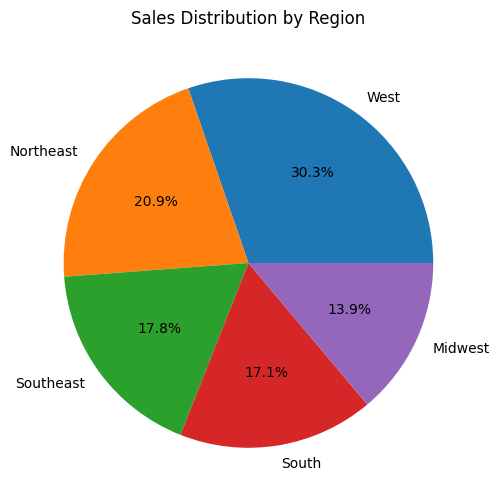

In [408]:
plt.figure(figsize=(10, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

This chart provides a clear visual of the relative contribution of each region to total sales:

West: Approximately 30%

Northeast: About 21%

Southeast: Around 18%

South: Close to 17%

Midwest: About 14% 

The West region clearly dominates, accounting for the largest portion of all sales. 
The Midwest lags behind other regions significantly.

In [409]:
df['product_category'] = df['product'].apply(lambda x: x.split()[1])
category_sales = df.groupby('product_category')['total_sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(category_sales)


Total Sales by Product Category:
product_category
Street      44852707
Apparel     40299867
Athletic    34843701
Name: total_sales, dtype: int64


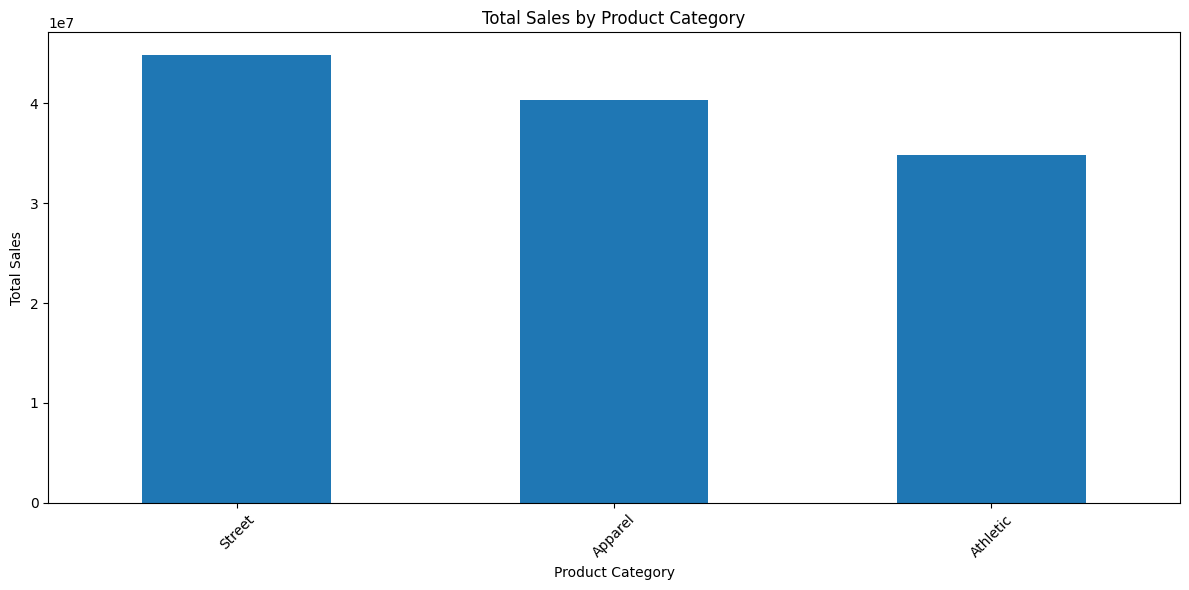

In [410]:
plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It shows that the "Street" category has the highest total sales, followed by "Apparel" and "Athletic".

In [411]:
df.head()

,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method,product_category
0,1,Foot Locker,1185732,2021-11-06,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online,Street
1,2,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet,Apparel
2,3,West Gear,1128299,2021-01-19,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet,Athletic
3,4,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online,Apparel
4,5,Sports Direct,1197831,2021-09-14,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet,Street


In [412]:
df.dtypes

sales_id             int64
retailer            object
retailer_id          int64
invoice_date        object
region              object
state               object
city                object
product             object
price_per_unit       int64
units_sold           int64
total_sales          int64
operating_profit     int64
sales_method        object
product_category    object
dtype: object

In [413]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [414]:
df['Month'] = df['invoice_date'].dt.month
df['Year'] = df['invoice_date'].dt.year

Extracts the month and Year from the 'invoice_date' and stores it in a new columns called Month and Year

In [415]:
df.head()

,sales_id,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method,product_category,Month,Year
0,1,Foot Locker,1185732,2021-11-06,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online,Street,11,2021
1,2,Foot Locker,1185732,2020-03-14,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet,Apparel,3,2020
2,3,West Gear,1128299,2021-01-19,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet,Athletic,1,2021
3,4,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103,218,22454,1257,Online,Apparel,6,2021
4,5,Sports Direct,1197831,2021-09-14,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet,Street,9,2021


In [416]:
df.set_index('invoice_date', inplace=True)
monthly_sales = df.resample('M')['total_sales'].sum()

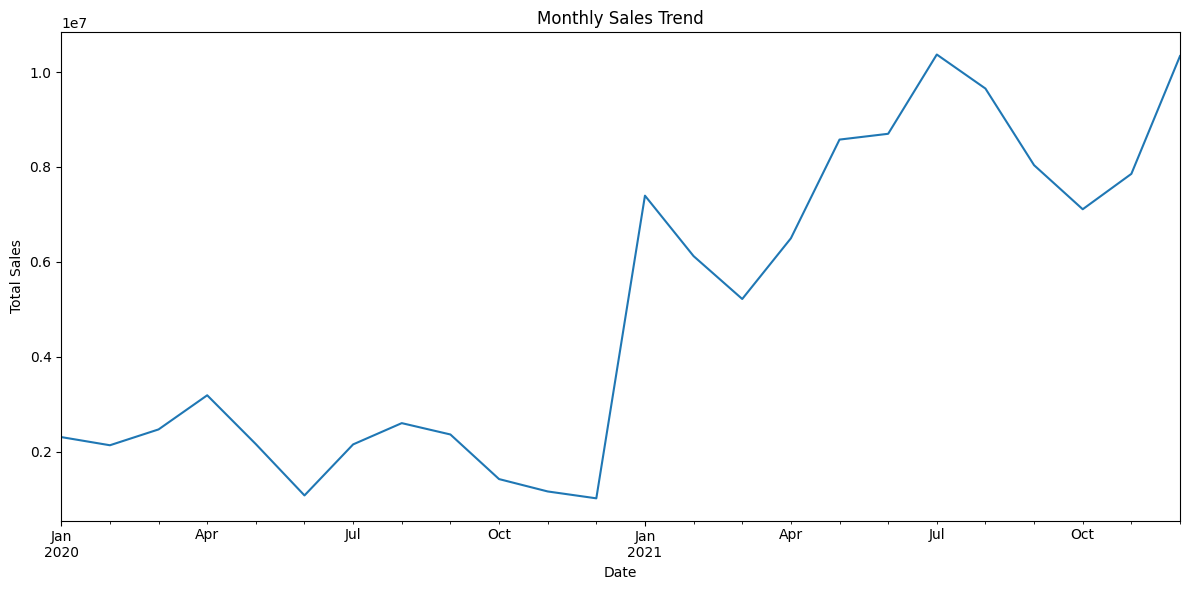

In [417]:
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

The graph shows a general upward trend in sales over the course of the year, with peaks and dips at different months.

In [418]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

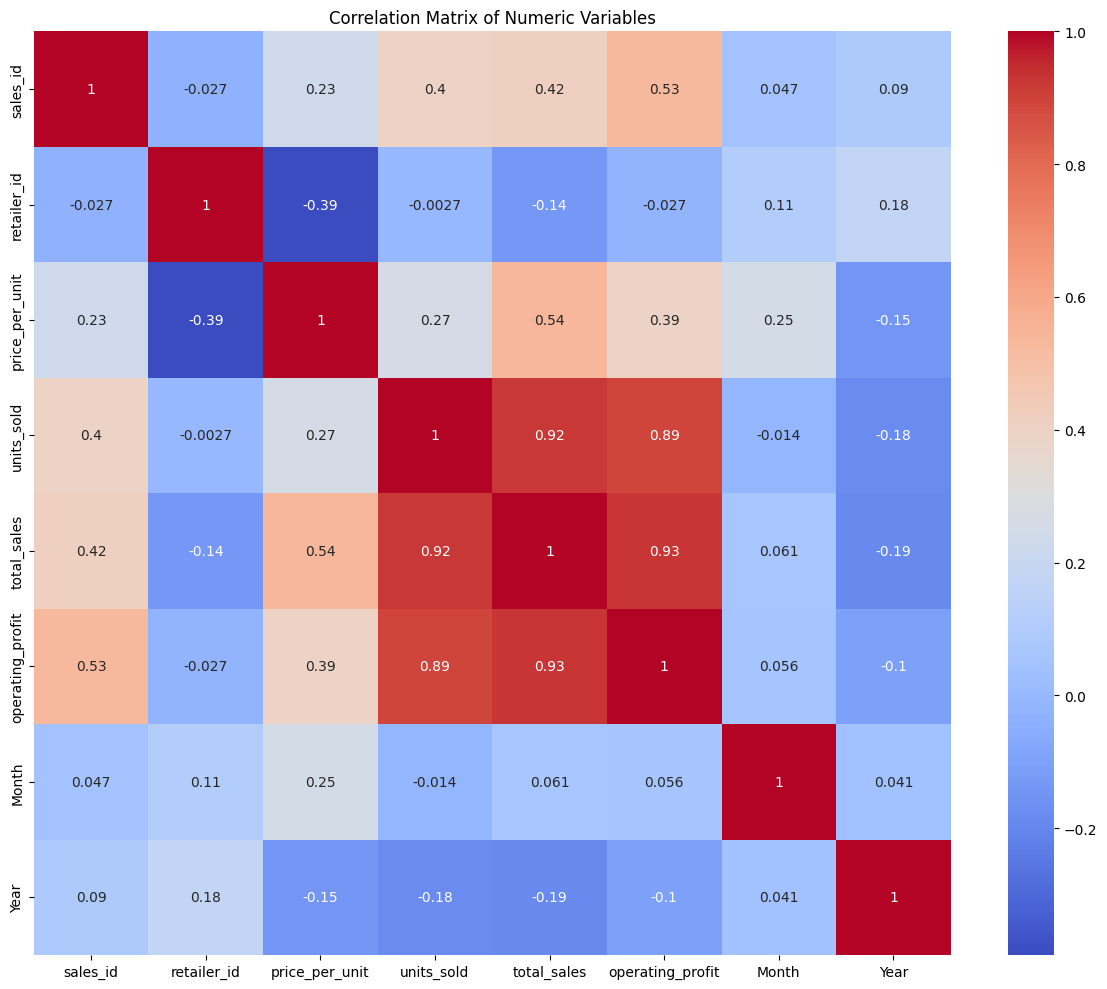

In [419]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

From the heatmap, we can see that:

* Total_sales and units_sold have a very strong positive correlation (0.93), which makes sense because they are directly related.

* Operating_profit and total_sales have a strong positive correlation (0.89), which makes sense because higher sales typically lead to higher profits.

* Units_sold and price_per_unit have a moderate positive correlation (0.54), which is not surprising, but could suggest that price plays a role in sales.

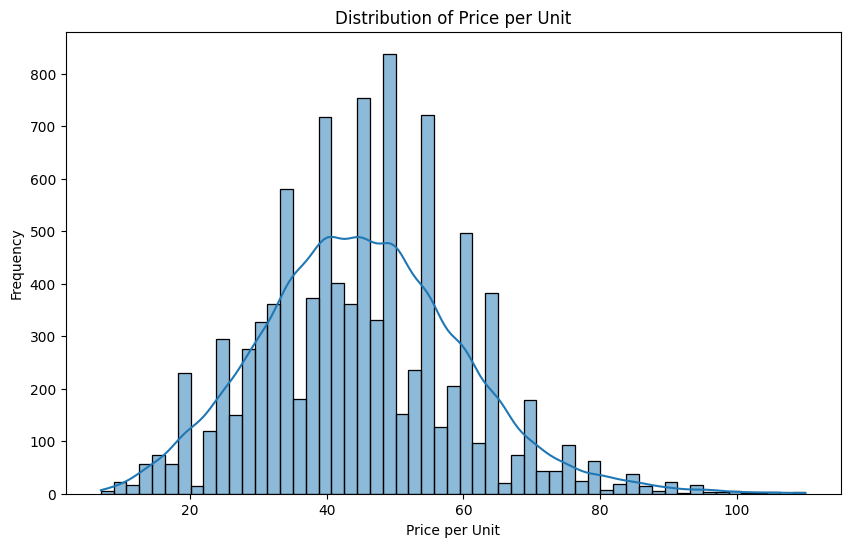

In [420]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_unit'], kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()


It helps to understand the central tendency, spread, and shape of the price distribution for the given products.


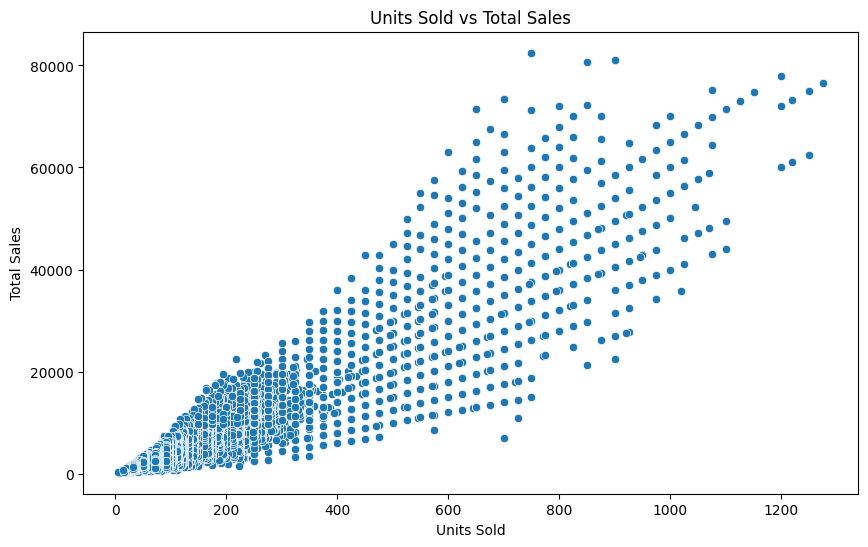

In [421]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='units_sold', y='total_sales')
plt.title('Units Sold vs Total Sales')
plt.xlabel('Units Sold')
plt.ylabel('Total Sales')
plt.show()

* It shows that there is a strong positive correlation between the two variables. 
* As the number of units sold increases, the total sales also increase. 
* This is a good sign for the business, as it suggests that their sales are growing in a sustainable way.

In [422]:
city_sales = df.groupby('city')['total_sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Cities by Sales:")
print(city_sales)



Top 10 Cities by Sales:
city
New York         5676160
Charleston       4904272
San Francisco    4837470
Portland         4176777
Orlando          3946476
Miami            3874113
Los Angeles      3651288
Houston          3571007
New Orleans      3377031
Seattle          3222093
Name: total_sales, dtype: int64


It is grouped by the "City" column, and for each city, the total sales are calculated. After summing the sales for each City, the City are sorted from highest to lowest sales.

Text(0.5, 1.0, 'Top 10')

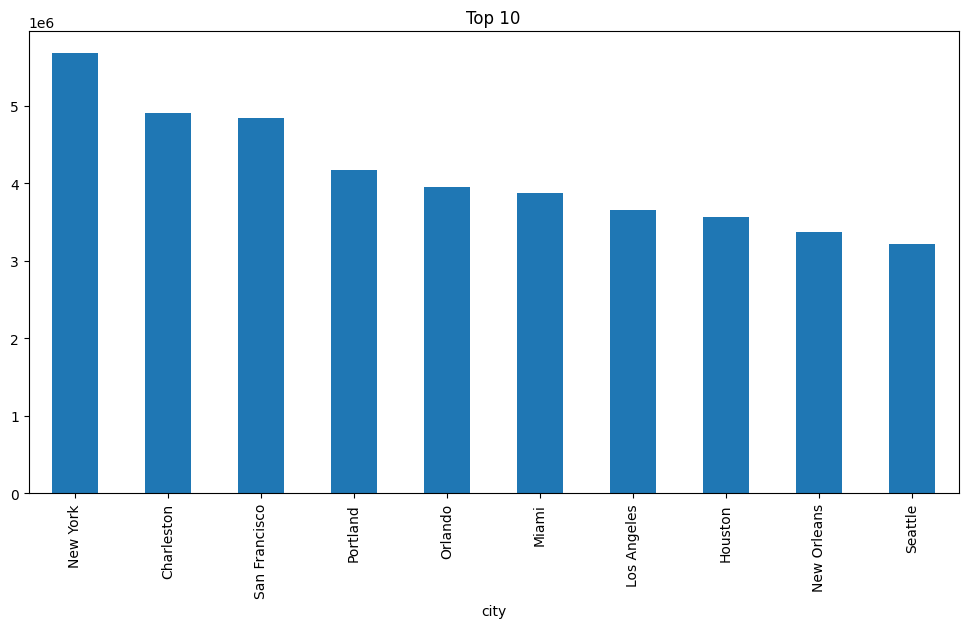

In [423]:
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.title('Top 10')

* It shows a bar chart visualization of the sales by city. 
* The top 10 cities by sales are shown. 
* The city with the highest sales is New York. 
* The city with the lowest sales is Seattle. 
* The chart is titled "Top 10".

## Identifying the outliers

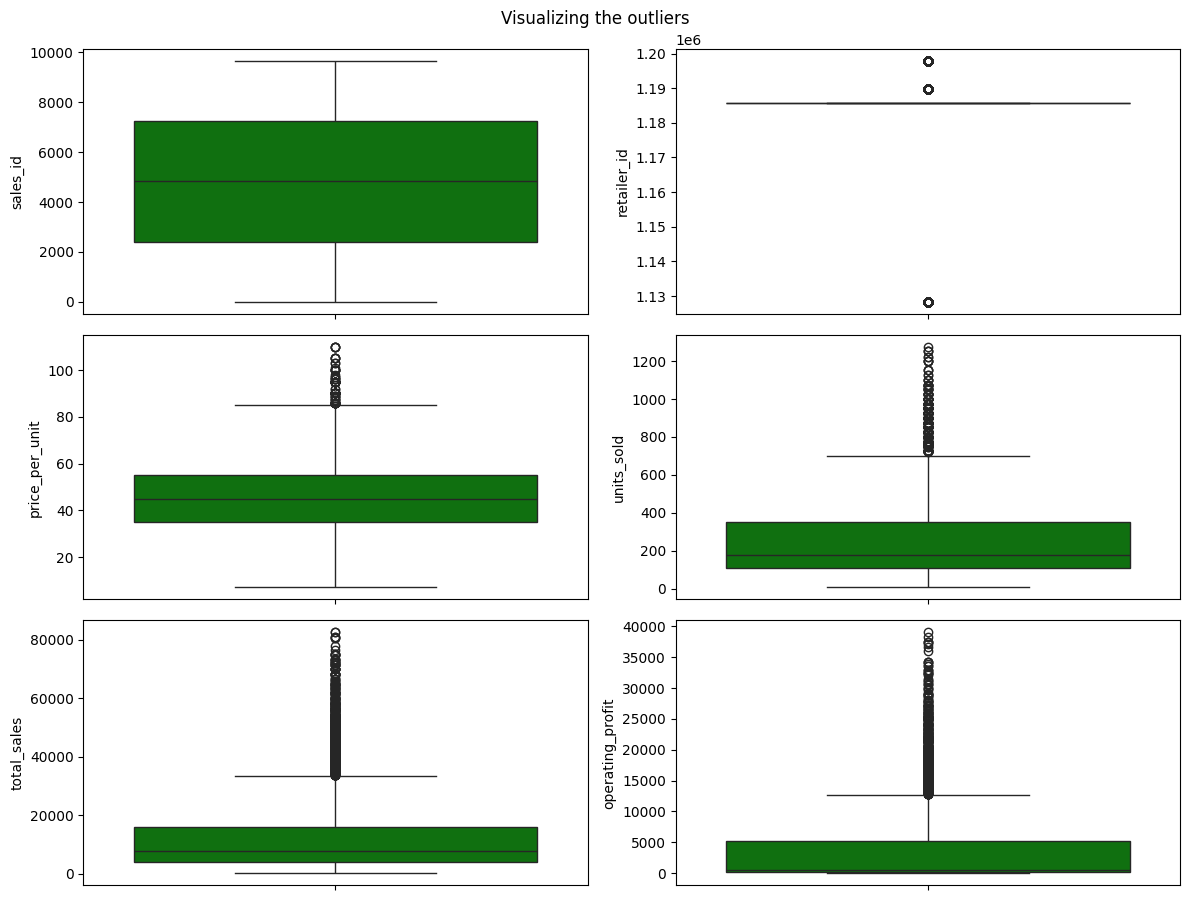

In [424]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(12,12))
plt.suptitle("Visualizing the outliers")
pltno=1     
for i in numcol:
    if pltno<=8:
        plt.subplot(4,2,pltno)
        sns.boxplot(df[i],color="green")
    pltno=pltno+1
plt.tight_layout()

The outliers present in the following columns:
1. retailer_id
2. price-per_unit
3. units_sold
4. total_sales
5. operating_profit

# Removing outliers
# 1. Zscore method

In [425]:
from scipy.stats import zscore

In [426]:
features=df[['sales_id','retailer_id','price_per_unit','units_sold','total_sales','operating_profit','Month','Year']]
z=np.abs(zscore(features))

In [427]:
z

,sales_id,retailer_id,price_per_unit,units_sold,total_sales,operating_profit,Month,Year
invoice_date,,,,,,,,
2021-11-06,1.731871,0.450898,0.325159,0.098623,0.113979,0.488878,1.314313,0.394706
2020-03-14,1.731512,0.450898,0.053119,0.098623,0.026471,0.554770,1.000756,2.533532
2021-01-19,1.731152,1.727757,0.121129,0.098623,0.048348,0.582087,1.579523,0.394706
2021-06-17,1.730793,1.727757,3.929679,0.181637,0.787128,0.403052,0.132605,0.394706
2021-09-14,1.730433,0.909860,0.626979,0.098623,0.192299,0.537236,0.735545,0.394706
...,...,...,...,...,...,...,...,...
2021-11-18,1.730433,0.450898,1.345306,0.499266,0.212602,0.185072,1.314313,0.394706
2021-10-22,1.730793,0.450898,1.345306,0.499266,0.212602,0.185072,1.024929,0.394706
2021-10-22,1.731152,0.450898,2.025404,0.499266,0.094560,0.115857,1.024929,0.394706


Now we have removed the outliers.

In [428]:
# Creating New Dataframe
newdf=df[(z<3).all(axis=1)]
newdf

,sales_id,retailer,retailer_id,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,sales_method,product_category,Month,Year
invoice_date,,,,,,,,,,,,,,,
2021-11-06,1,Foot Locker,1185732,Southeast,South Carolina,Charleston,Men's Street Footwear,50,278,13900,792,Online,Street,11,2021
2020-03-14,2,Foot Locker,1185732,Northeast,New York,New York,Men's Apparel,46,278,12788,435,Outlet,Apparel,3,2020
2021-01-19,3,West Gear,1128299,West,California,San Francisco,Men's Athletic Footwear,47,278,13066,287,Outlet,Athletic,1,2021
2021-09-14,5,Sports Direct,1197831,South,Alabama,Birmingham,Women's Street Footwear,36,278,10008,530,Outlet,Street,9,2021
2021-07-06,6,West Gear,1197831,West,Idaho,Boise,Women's Street Footwear,34,278,9452,397,Outlet,Street,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,9633,Amazon,1185732,Northeast,Maine,Portland,Men's Apparel,65,150,9750,2438,Outlet,Apparel,11,2021
2021-10-22,9634,Amazon,1185732,West,Alaska,Anchorage,Women's Athletic Footwear,65,150,9750,2438,Outlet,Athletic,10,2021
2021-10-22,9635,Amazon,1185732,West,Alaska,Anchorage,Men's Apparel,75,150,11250,2813,Outlet,Apparel,10,2021


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [429]:
# Shape of original Dataset
df.shape

(9637, 15)

Before removing the outliers we had 9637 rows and 15 columns in our dataset.

In [430]:
# Shape of new dataframe
newdf.shape

(9252, 15)

After removing the outliers we have 9252 rows and 15 columns.

In [431]:
dataloss=((9637-9252)/9637)*100
dataloss

3.9950191968454916

Here we are losing more than 3.9% of data. Let's check the data loss using IQR method and then we will decide whether to remove outliers or not.

# 2. IQR (Inter Quantile Range) method

In [432]:
# Assuming `features` is the subset of numerical columns you are analyzing
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# Filter the DataFrame to remove outliers across all numerical columns
df1 = df[~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)]

We have removed the outliers using IQR method.

In [433]:
df1.shape

(4493, 15)

Using IQR method the dataframe has 4493 rows and 15 columns.

In [434]:
dataloss1=((9637-4493)/9637)*100
dataloss1

53.37760713915118

Using IQR method we are losing 68.87% of data.

Using IQR method the data loss is very high compared to Zscore method, so lets consider Zscore method.

# Removing skewness using yeo-johnson Method

In [435]:
skew1=['price_per_unit','units_sold','total_sales','operating_profit']
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [436]:
newdf[skew1] = PT.fit_transform(newdf[skew1])

In [437]:
# Checking the skewness after using yeo-johnson method
newdf[skew1].skew()

price_per_unit     -0.014950
units_sold         -0.008650
total_sales        -0.010745
operating_profit    0.080815
dtype: float64

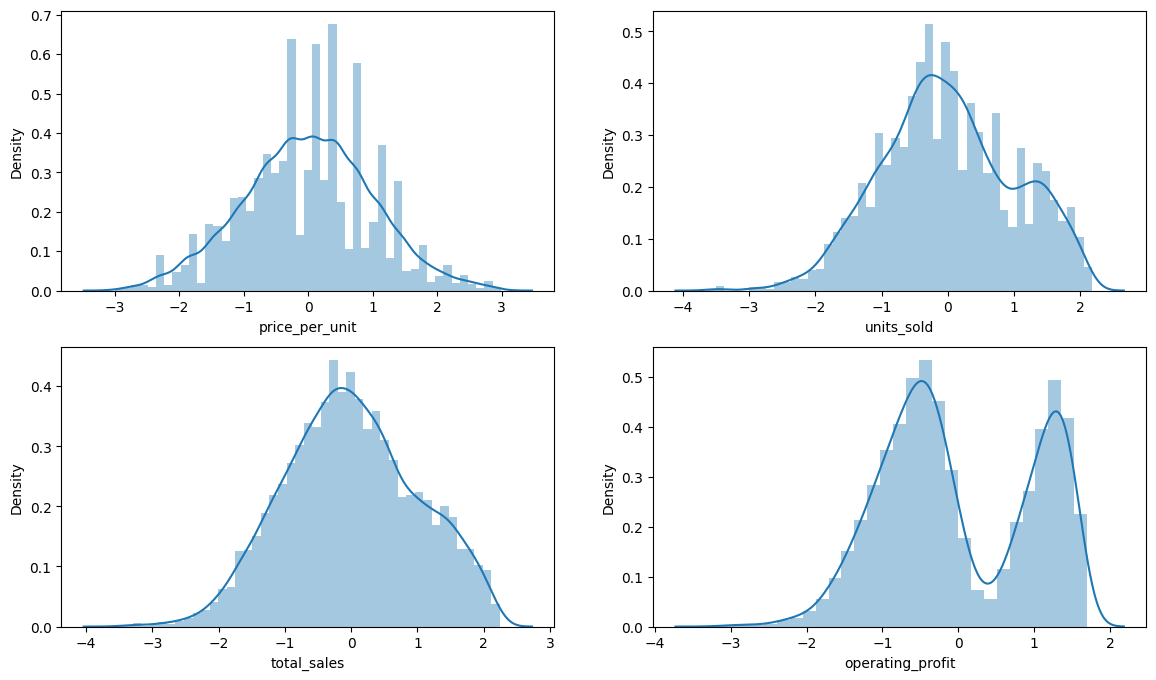

In [438]:
plt.figure(figsize=(14, 8))
plotnumber=1
for column in newdf[skew1]:
    if plotnumber<=9:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(newdf[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Encoding the categorical columns 

In [439]:
catcol=newdf.select_dtypes('object').columns
catcol

Index(['retailer', 'region', 'state', 'city', 'product', 'sales_method',
       'product_category'],
      dtype='object')

This shows all categorical columns

In [440]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
newdf[catcol]=OE.fit_transform(newdf[catcol])

The categorical columns have been conveted into numerical columns by using ordinalEncoder

# Separting the feature and Label Variable into x and y

In [441]:
x=newdf.iloc[:,:-1]

In [442]:
y=newdf.iloc[:,-1]

We have separted both dependent and independent variable

In [443]:
x.shape

(9252, 14)

In [444]:
y.shape

(9252,)

# Split Train and Test Set

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.


In [445]:
from sklearn.model_selection import train_test_split

In [446]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

Here we have created new test train split.

# Regression Algorithms

In [447]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Random Forest Regressor

R2_Score: 0.996825261514443
MAE: 0.002154178674350363
MSE: 0.00033775216138316896
RMSE: 0.01837803475301886


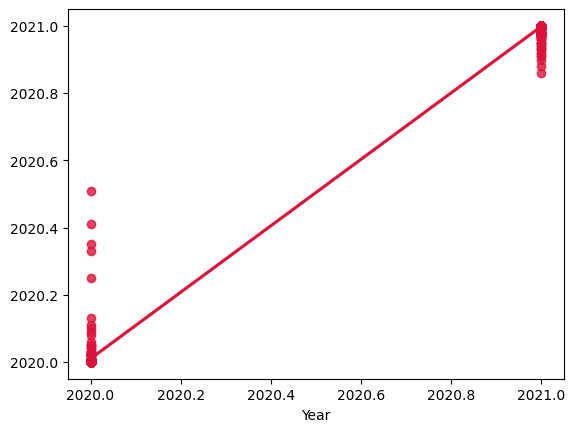

In [448]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(xtrain,ytrain)

# prediction
predRFR=RFR.predict(xtest)
rf=r2_score(ytest,predRFR)
print('R2_Score:',rf)
print('MAE:',metrics.mean_absolute_error(ytest, predRFR))
print('MSE:',metrics.mean_squared_error(ytest, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predRFR)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predRFR,color="crimson")
plt.show()

We have created Random Forest Regressor and checked the evaluation metrics. The predicted R2 score for Random Forest Regressor is 99.64%. 

## Decision Tree Regressor

R2_Score: 0.9966139734582358
MAE: 0.00036023054755043225
MSE: 0.00036023054755043225
RMSE: 0.018979740450028083


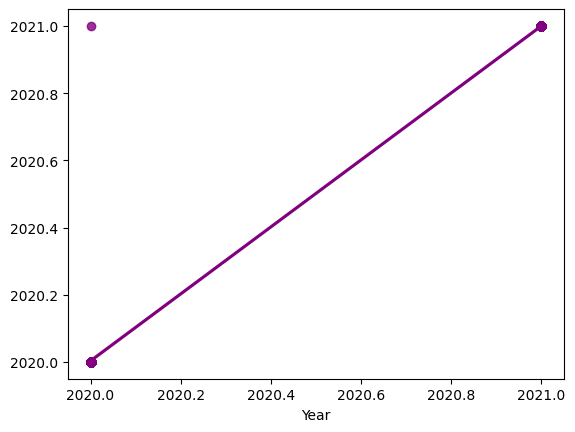

In [449]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(xtrain,ytrain)

# prediction
predDTR=DTR.predict(xtest)
dt=r2_score(ytest,predDTR)
print('R2_Score:',dt)
print('MAE:',metrics.mean_absolute_error(ytest, predDTR))
print('MSE:',metrics.mean_squared_error(ytest, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predDTR)))

# Visualizing the predicteed values
sns.regplot(x=ytest,y=predDTR,color="purple")
plt.show()

We have created Decision Tree Regressor and checked the evaluation metrics. The predicted R2 score for Decision Tree Regressor is 99.66%.

## GradientBoosting Regressor

R2_Score: 0.9613220152328238
MAE: 0.033829738226797655
MSE: 0.004114850093161864
RMSE: 0.06414709730893413


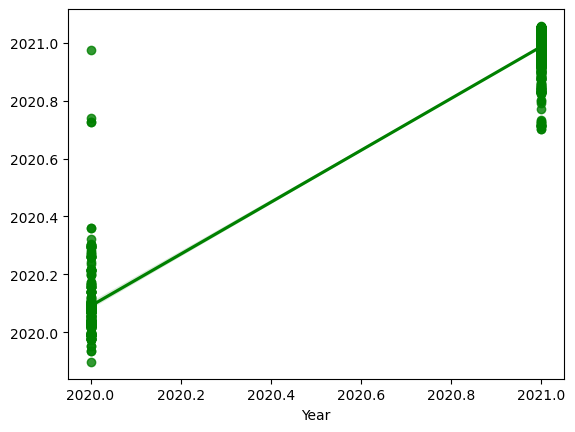

In [450]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(xtrain,ytrain)

# prediction
predGB=GB.predict(xtest)
gbr=r2_score(ytest,predGB)
print('R2_Score:',gbr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predGB))
print('MSE:',metrics.mean_squared_error(ytest, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predGB)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predGB,color="green")
plt.show()

We have created Gradient Boosting Regressor and checked the evaluation metrics. The predicted R2 score for Gradient Boosting Regressor is 96.13%.

## BaggingRegressor

R2_Score: 0.9970202966432484
MAE: 0.0010086455331408664
MSE: 0.00031700288184427884
RMSE: 0.01780457474483114


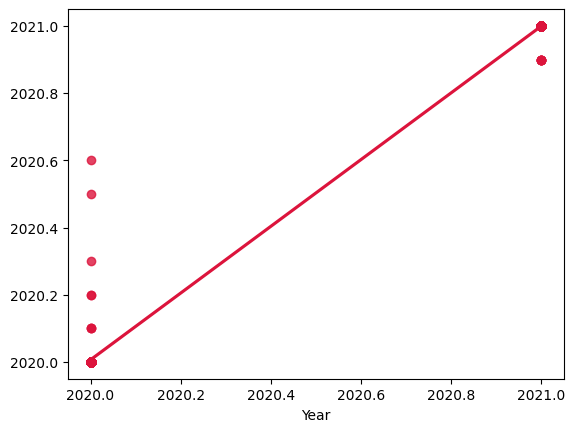

In [451]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(xtrain,ytrain)

# prediction
predBR=BR.predict(xtest)
bgr=r2_score(ytest,predBR)
print('R2_Score:',bgr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predBR))
print('MSE:',metrics.mean_squared_error(ytest, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predBR)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predBR,color="crimson")
plt.show()

We have created Bagging Regressor and checked the evaluation metrics. The predicted R2 score for Bagging Regressor is 99.73%.

## XGB Regressor

R2_Score: 0.9991114139556885
MAE: 0.0010987647328665345
MSE: 9.453668653621453e-05
RMSE: 0.009722997816322625


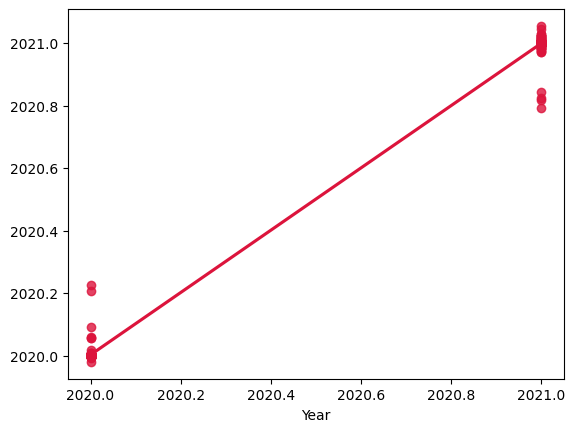

In [452]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb()
XGB.fit(xtrain,ytrain)

# prediction
predXGB=XGB.predict(xtest)
xgb1=r2_score(ytest,predXGB)
print('R2_Score:',xgb1)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predXGB))
print('MSE:',metrics.mean_squared_error(ytest, predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predXGB)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predXGB,color="crimson")
plt.show()

We have created XGB Regressor and checked the evaluation metrics. The predicted R2 score for XGB Regressor is 99.91%.

# ExtraTrees Regressor

R2_Score: 0.9965184875097596
MAE: 0.0036743515850120503
MSE: 0.00037038904899118523
RMSE: 0.019245494251673174


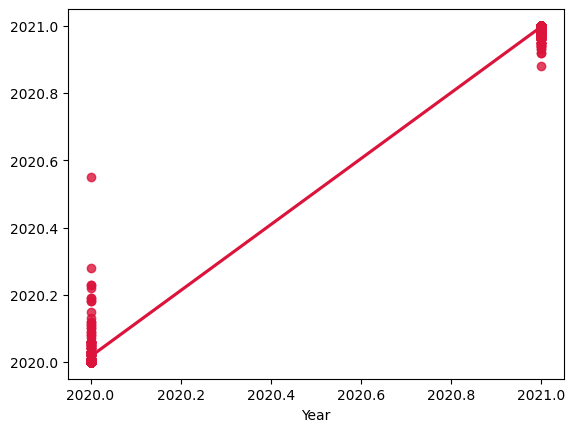

In [453]:
# Checking R2 score for Extra Trees Regressor

XT=ExtraTreesRegressor()
XT.fit(xtrain,ytrain)

# prediction
predXT=XT.predict(xtest)
etr=r2_score(ytest,predXT)
print('R2_Score:',etr)

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(ytest, predXT))
print('MSE:',metrics.mean_squared_error(ytest, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(ytest, predXT)))

# Visualizing the predicted values
sns.regplot(x=ytest,y=predXT,color="crimson")
plt.show()

We have created Extra Trees Regressor and checked the evaluation metrics. The predicted R2 score for Extra Trees Regressor is 99.69%.

# Checking the cross validation score

In [454]:
from sklearn.model_selection import cross_val_score

In [455]:
# Checking cv score for Random Forest Regressor
rf_cv=cross_val_score(RFR,x,y,cv=5).mean()
print(rf_cv)

0.8701643349034613


In [456]:
# Checking cv score for Decision Tree Regressor
dt_cv=cross_val_score(DTR,x,y,cv=5).mean()
print(dt_cv)


0.8614345569652716


In [457]:
# Checking cv score for Gradient Boosting Regressor
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
print(gb_cv)

0.873308167418473


In [458]:
# Checking cv score for Bagging Regressor
br_cv=cross_val_score(BR,x,y,cv=5).mean()
print(br_cv)

0.8712820623585122


In [459]:
# Checking cv score for XGBRegressor
xgb_cv=cross_val_score(XGB,x,y,cv=5).mean()
print(xgb_cv)

0.8962149381637573


In [460]:
# Checking cv score for ExtraTreesRegressor
et_cv=cross_val_score(XT,x,y,cv=5).mean()
print(et_cv)

0.8881081738736303


In [461]:
Model_list=['Random Forest Regressor','Decision Tree Regressor','Gradient Boosting Regressor','Bagging Regressor','XGB Regressor','Extra Trees Regressor']

In [462]:
accuracyscore=[rf,dt,gbr,bgr,xgb1,etr]

In [463]:
crossval=[rf_cv,dt_cv,gb_cv,br_cv,xgb_cv,et_cv]

In [464]:
models=pd.DataFrame({})
models['Regressor']=Model_list
models['Accuracy_score']=accuracyscore
models['crossval']=crossval

In [465]:
models

,Regressor,Accuracy_score,crossval
0,Random Forest Regressor,0.996825,0.870164
1,Decision Tree Regressor,0.996614,0.861435
2,Gradient Boosting Regressor,0.961322,0.873308
3,Bagging Regressor,0.997020,0.871282
4,XGB Regressor,0.999111,0.896215
5,Extra Trees Regressor,0.996518,0.888108


Above are the cross validation score for the models that we have used.

From the differences between the R2 score and Cross Validation Score we can conclude that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper Parameter Tuning

In [466]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [467]:
#XGB Regressor

parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

These are the parameters of XGB Regressor.

In [468]:
GCV = GridSearchCV(XGBRegressor(), parameters, cv=5)

Running GridSearchCV for XGB Regressor.

In [469]:
GCV.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200, 400],
                         'n_jobs': [-2, -1, 1]})

In [470]:
GCV.best_params_

{'gamma': np.float64(0.0), 'max_depth': 4, 'n_estimators': 400, 'n_jobs': -2}

These are the best parameters values.

R2_Score 0.998261570930481
MAE 0.004606219464832493
MSE 0.00018494861785547877
RMSE 0.013599581532366308


<Axes: xlabel='Year'>

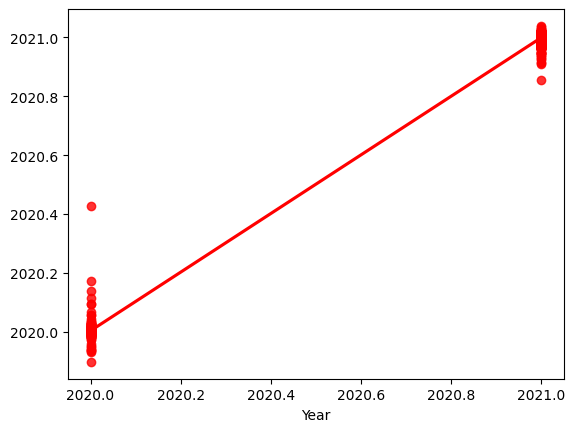

In [471]:
Final_model2=xgb(gamma=0.0, max_depth=4, n_estimators=400, n_jobs= -2)
Final_model2.fit(xtrain,ytrain)
pred=Final_model2.predict(xtest)
print('R2_Score',r2_score(ytest,pred))
print('MAE',metrics.mean_absolute_error(ytest,pred))
print('MSE',metrics.mean_squared_error(ytest,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(ytest,pred)))
sns.regplot(x=ytest,y=pred,color='r')

Great!!!...After hyper parameter tuning our best model accuracy is giving 99.82% which is good.